In [1]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. loading data
file_path = "DryBeanDataset/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 2. encoding categorical labels
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

# 3. standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Class', 'Class_encoded'], axis=1))

# 4. combining processed features with labels
processed_df = pd.concat([
    # features after scaling
    pd.DataFrame(X_scaled, columns=[f"scaled_{col}" for col in df.columns if col not in ['Class', 'Class_encoded']]),
    
    # original and encoded labels
    df[['Class', 'Class_encoded']]
], axis=1)

output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)  
output_path = os.path.join(output_dir, "dry_bean_processed.csv")
processed_df.to_csv(output_path, index=False)

print(f"\npreprocessed data has been saved to：{os.path.abspath(output_path)}")
print("structure：")
print(pd.read_csv(output_path).head(3))


preprocessed data has been saved to：e:\OneDrive - HKUST (Guangzhou)\desk\study\classes\2025spring\MACHINE_LEARNING\project\processed_data\dry_bean_processed.csv
structure：
   scaled_Area  scaled_Perimeter  scaled_MajorAxisLength  \
0    -0.840749         -1.143319               -1.306598   
1    -0.829188         -1.013924               -1.395911   
2    -0.807157         -1.078829               -1.252357   

   scaled_MinorAxisLength  scaled_AspectRation  scaled_Eccentricity  \
0               -0.631153            -1.565053            -2.185720   
1               -0.434445            -1.969784            -3.686040   
2               -0.585735            -1.514291            -2.045336   

   scaled_ConvexArea  scaled_EquivDiameter  scaled_Extent  scaled_Solidity  \
0          -0.841451             -1.063341       0.289087         0.367613   
1          -0.826102             -1.044217       0.697477        -0.462907   
2          -0.808704             -1.008084       0.578195         0

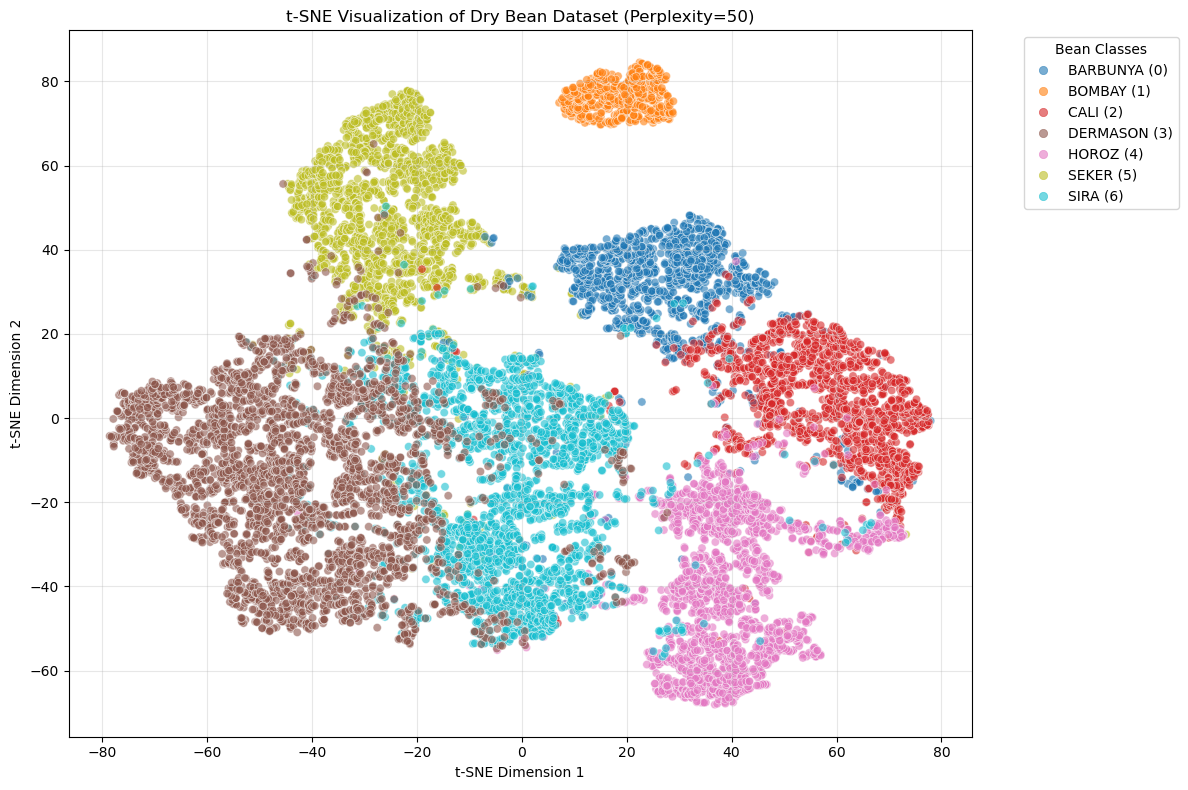

In [4]:
'''
Dry Bean Dataset Visualization Using t-SNE (2D)
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

processed_df = pd.read_csv("processed_data/dry_bean_processed.csv")
X = processed_df.filter(regex='^scaled_').values
class_encoded = processed_df['Class_encoded'].values
class_names = processed_df['Class'].values

tsne = TSNE(n_components=2, 
            perplexity=50, 
            # max_iter=1000,
            random_state=42)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame({
    't-SNE1': X_tsne[:, 0],
    't-SNE2': X_tsne[:, 1],
    'Class': class_names,
    'ClassCode': class_encoded
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=tsne_df['t-SNE1'],
    y=tsne_df['t-SNE2'],
    c=tsne_df['ClassCode'],
    cmap='tab10',  # using 'tab10' colormap for better color distinction
    alpha=0.6,
    edgecolors='w',
    linewidths=0.5
)

class_labels = sorted(tsne_df[['Class', 'ClassCode']].drop_duplicates().values, 
                     key=lambda x: x[1])
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[f"{name} ({code})" for name, code in class_labels],
    title="Bean Classes",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.title(f't-SNE Visualization of Dry Bean Dataset (Perplexity={50})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('tsne_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# 3D t-SNE dimensionality reduction
tsne_3d = TSNE(
    n_components=3,
    perplexity=30,
    max_iter=1000,
    random_state=42
)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_tsne_3d[:,0], 
    X_tsne_3d[:,1], 
    X_tsne_3d[:,2],
    c=class_encoded,
    cmap='tab10',
    alpha=0.7,
    edgecolor='w',
    s=40
)

# adding labels and title
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
plt.title('3D t-SNE Visualization of Dry Bean Dataset (Perplexity=30)')

# adding legend
legend_labels = [f"{name} ({code})" for name, code in class_labels]
ax.legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    title="Bean Classes",
    bbox_to_anchor=(1.1, 1),
    loc='upper left'
)

# setting view angle
ax.view_init(elev=25, azim=-45)  # adjust the elevation and azimuth angles for better view

plt.tight_layout()
plt.savefig('tsne_3d.png', dpi=300, bbox_inches='tight')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'max_iter'

In [7]:
pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/14.8 MB 2.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/14.8 MB 2.3 MB/s eta 0:00:06
   ------ --------------------------------- 2.4/14.8 MB 2.4 MB/s eta 0:00:06
   ------- -------------------------------- 2.9/14.8 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 3.4/14.8 MB 2.4 MB/s eta 0:00:05
   ---------- ----------------------------- 3.9/14.8 MB 2.6 MB/s eta 0:00:05
   ------------ --------------------------- 4.5/14.8 MB 2.4 MB/s eta 0:00:05
   ------------- -------------------------- 5.0/14.8 MB 2.5 MB/s eta 0:00:04
   -------------- ------------------------- 5.2/14.8 MB 2.6 MB/s eta 0:00:04
   -------------- --

In [9]:
import plotly.express as px
import pandas as pd
from sklearn.manifold import TSNE

# 生成3D t-SNE坐标
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)  # X_scaled为已标准化的特征

# 构建包含3D坐标和类别的DataFrame
tsne_df = pd.DataFrame({
    't-SNE1': X_tsne_3d[:, 0],
    't-SNE2': X_tsne_3d[:, 1],
    't-SNE3': X_tsne_3d[:, 2],
    'Class': class_names  # 原始类别名称列
})

# 创建交互式3D图表
fig = px.scatter_3d(
    tsne_df,
    x='t-SNE1',
    y='t-SNE2',
    z='t-SNE3',
    color='Class',
    color_discrete_sequence=px.colors.qualitative.Dark24,  # 更鲜明的配色
    title='3D Interactive t-SNE Visualization of Dry Beans (Perplexity=30)',
    labels={'Class': 'Bean Class'},
    hover_name='Class',      # 悬停显示类别名称
    opacity=0.7,            # 半透明效果
    width=1000,             # 画布尺寸
    height=800
)

# 优化布局
fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.1))  # 初始视角
    ),
    legend=dict(
        title_font_size=14,
        itemsizing='constant'  # 统一图例标记大小
    )
)

# 保存为独立HTML文件（可拖拽）
fig.write_html("interactive_3d_tsne.html")

# 在Jupyter中直接显示
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\lyl61\.conda\envs\jupyter\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\lyl61\.conda\envs\jupyter\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\lyl61\.conda\envs\jupyter\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,



=== 聚类质量评估结果 ===
* 内部指标:
  - 轮廓系数(Silhouette): 0.284 (越接近1越好)
  - Calinski-Harabasz指数: 6,981.3 (越大越好)

* 外部指标:
  - 调整兰德指数(ARI): 0.658 (1=完美匹配，0=随机)
  - 标准化互信息(NMI): 0.733 (1=完美匹配)



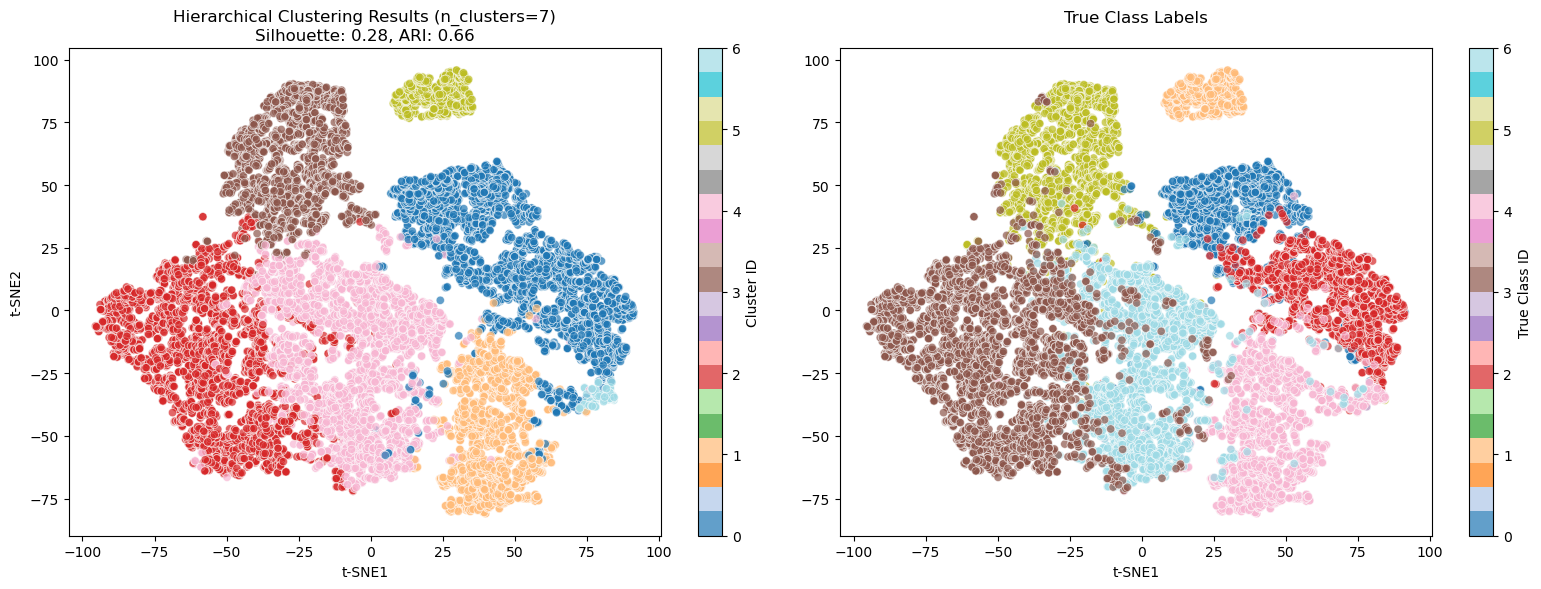

In [3]:
# -*- coding: utf-8 -*-
"""
Dry Bean 层次聚类分析与可视化
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering

# 1. 加载预处理后的数据
processed_df = pd.read_csv("processed_data/dry_bean_processed.csv")
X_scaled = processed_df.filter(regex='^scaled_').values
true_labels = processed_df['Class_encoded'].values

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_2d = tsne.fit_transform(X_scaled)

# 2. 层次聚类（这里假设预设7个簇，与真实类别数一致）
n_clusters = 7  # 可根据实际需要调整

model = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean', 
    linkage='ward'       # Ward 方法仍需要欧氏距离
)
cluster_labels = model.fit_predict(X_scaled)

# 3. 评估指标计算
# 内部评价指标（不需要真实标签）
silhouette = silhouette_score(X_scaled, cluster_labels)
calinski = calinski_harabasz_score(X_scaled, cluster_labels)

# 外部评价指标（需要真实标签）
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"""
=== 聚类质量评估结果 ===
* 内部指标:
  - 轮廓系数(Silhouette): {silhouette:.3f} (越接近1越好)
  - Calinski-Harabasz指数: {calinski:,.1f} (越大越好)

* 外部指标:
  - 调整兰德指数(ARI): {ari:.3f} (1=完美匹配，0=随机)
  - 标准化互信息(NMI): {nmi:.3f} (1=完美匹配)
""")

# 4. 可视化（使用新计算的t-SNE坐标）
plt.figure(figsize=(16, 6))

# 子图1：聚类结果
plt.subplot(121)
sc1 = plt.scatter(
    tsne_2d[:, 0], tsne_2d[:, 1],
    c=cluster_labels,
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)
plt.title(f'Hierarchical Clustering Results (n_clusters={n_clusters})\nSilhouette: {silhouette:.2f}, ARI: {ari:.2f}')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar(sc1, label='Cluster ID')

# 子图2：真实类别对比
plt.subplot(122)
sc2 = plt.scatter(
    tsne_2d[:, 0], tsne_2d[:, 1],
    c=true_labels,
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)
plt.title('True Class Labels\n')
plt.xlabel('t-SNE1')
plt.colorbar(sc2, label='True Class ID')

plt.tight_layout()
plt.savefig('hierarchical_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

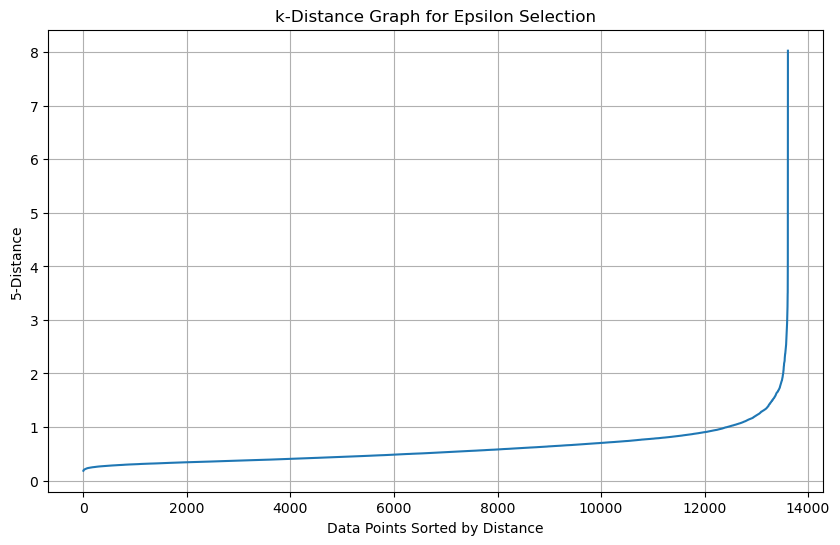


=== DBSCAN聚类质量 ===
* 参数设置:
  - eps = 0.5
  - min_samples = 10
* 评估指标:
  - 轮廓系数(非噪声点): 0.044
  - 调整兰德指数(ARI): 0.053
  - 标准化互信息(NMI): 0.194



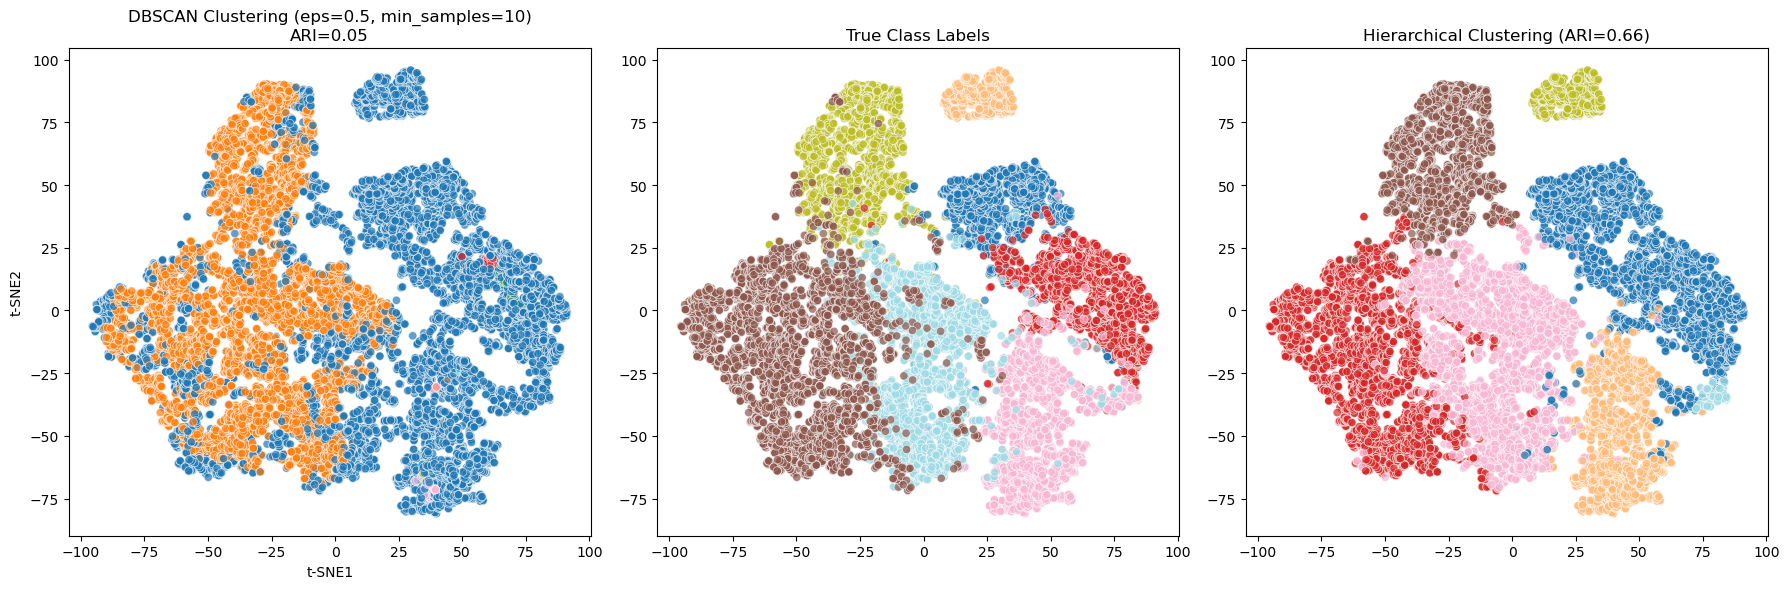

In [9]:
# -*- coding: utf-8 -*-
"""
DBSCAN聚类分析 + 参数优化与可视化（修复版）
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.neighbors import NearestNeighbors

# 1. 加载预处理后的数据（仅需标准化特征）
processed_df = pd.read_csv("processed_data/dry_bean_processed.csv")
X_scaled = processed_df.filter(regex='^scaled_').values
true_labels = processed_df['Class_encoded'].values

# 2. 动态计算t-SNE坐标（关键修复点）
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_2d = tsne.fit_transform(X_scaled)  # 直接使用标准化后的特征

# 3. 参数优化：通过k-distance图确定最佳eps
def find_optimal_eps(X, k=5):
    """自动绘制k-distance曲线辅助确定eps"""
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    k_distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_distances)
    plt.xlabel('Data Points Sorted by Distance')
    plt.ylabel(f'{k}-Distance')
    plt.title('k-Distance Graph for Epsilon Selection')
    plt.grid(True)
    plt.show()

find_optimal_eps(X_scaled, k=5)  # 根据图形结果手动设置eps参数

# 4. 参数设置（基于您的k-distance图）
eps = 0.5    # 拐点纵坐标约1.4
min_samples = 10

# 5. DBSCAN聚类
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 6. 评估指标（仅计算非噪声点）
mask = dbscan_labels != -1
if np.sum(mask) > 0:
    sil_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    ari = adjusted_rand_score(true_labels[mask], dbscan_labels[mask])
    nmi = normalized_mutual_info_score(true_labels[mask], dbscan_labels[mask])
else:
    sil_score = ari = nmi = -1

print(f"""
=== DBSCAN聚类质量 ===
* 参数设置:
  - eps = {eps}
  - min_samples = {min_samples}
* 评估指标:
  - 轮廓系数(非噪声点): {sil_score:.3f}
  - 调整兰德指数(ARI): {ari:.3f}
  - 标准化互信息(NMI): {nmi:.3f}
""")

# 7. 可视化（使用动态计算的tsne_2d）
plt.figure(figsize=(18, 6))

# 子图1：DBSCAN聚类结果
plt.subplot(131)
sc1 = plt.scatter(
    tsne_2d[:, 0], tsne_2d[:, 1],  # 使用动态计算的tsne_2d
    c=dbscan_labels,
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5,
    vmin=-1.5
)
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})\nARI={ari:.2f}')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

# 子图2：真实类别对比
plt.subplot(132)
plt.scatter(
    tsne_2d[:, 0], tsne_2d[:, 1],  # 使用动态计算的tsne_2d
    c=true_labels,
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)
plt.title('True Class Labels')

# 子图3：层次聚类对比（可选）
plt.subplot(133)
plt.scatter(
    tsne_2d[:, 0], tsne_2d[:, 1],  # 使用动态计算的tsne_2d
    c=cluster_labels,  # 假设已有层次聚类结果
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)
plt.title('Hierarchical Clustering (ARI=0.66)')

plt.tight_layout()
plt.savefig('dbscan_clustering.png', dpi=300, bbox_inches='tight')
plt.show()